In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings(action='ignore')

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

In [3]:
import pandas as pd
import numpy as np

from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

In [5]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder

import catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split,GridSearchCV
from tqdm import tqdm

from pathlib import Path
import warnings
warnings.filterwarnings(action = 'ignore')

In [7]:
print(tf.__version__)

2.7.0


In [8]:
%matplotlib inline

In [9]:
mov = pd.read_csv("train1.0.csv")
mov

,Unnamed: 0,month,year,num_of_screen0,num_of_screening0,nation2,num_of_ch,major_distributor,grade,time,...,gen13,gen14,gen15,gen16,gen17,gen18,a_avg_dir,r_avg_dir,a_avg_act,r_avg_act
0,0,5,2019,446,5998,0,5,0.0,3,102,...,0,0,0,0,0,0,4.193333e+05,7.146667,1.134620e+06,7.202083
1,1,11,2015,1105,51940,2,6,1.0,3,148,...,0,0,0,0,0,0,8.579925e+05,8.010000,1.267767e+06,7.820909
2,2,9,2019,59,1482,2,2,0.0,3,111,...,0,0,0,0,0,0,1.668550e+04,8.630000,2.379033e+04,8.341667
3,3,1,2018,211,9844,1,4,0.0,3,130,...,0,0,0,0,1,0,2.257683e+05,5.498639,2.588981e+06,8.140000
4,4,3,2016,380,9615,1,4,1.0,3,144,...,0,0,0,0,0,0,1.176000e+06,8.076000,2.838555e+05,7.517583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,2055,12,2015,1095,81042,0,0,1.0,2,124,...,0,0,0,0,0,0,4.386000e+06,7.952500,2.954000e+06,7.880286
2056,2056,3,2016,124,1444,0,0,0.0,2,109,...,0,0,0,0,0,0,2.257683e+05,5.498639,3.178646e+05,8.541429
2057,2057,10,2013,179,2130,0,0,0.0,3,96,...,0,0,0,0,0,0,1.218000e+03,8.020000,2.679018e+05,8.016250
2058,2058,9,2015,272,4501,1,4,1.0,3,98,...,0,0,0,0,0,0,6.400000e+04,7.770000,1.881589e+05,7.375750


In [10]:
y = pd.read_csv('y_train.csv')

In [11]:
y

,Unnamed: 0,boxoffice_num0
0,0,137294
1,1,1820760
2,2,32573
3,3,223740
4,4,145952
...,...,...
2055,2055,5129409
2056,2056,21687
2057,2057,23841
2058,2058,64157


In [12]:
mov['num'] = y['boxoffice_num0']

In [13]:
mov = mov.drop(columns = 'Unnamed: 0')

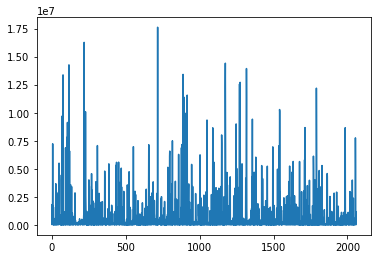

In [14]:
plt.plot(mov['num'])

In [15]:
mov['lognum'] = np.log(mov['num'])

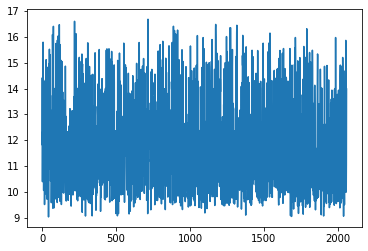

In [16]:
plt.plot(mov['lognum'])

In [17]:
# create a list of our conditions
conditions = [
    (mov['lognum'] <= 10),
    (mov['lognum'] > 10) & (mov['lognum'] <= 11),
    (mov['lognum'] > 11) & (mov['lognum'] <= 12),
    (mov['lognum'] > 12) & (mov['lognum'] <= 13),
    (mov['lognum'] > 13) & (mov['lognum'] <= 14),
    (mov['lognum'] > 14) & (mov['lognum'] <= 15),
    (mov['lognum'] > 15) & (mov['lognum'] <= 16),
    (mov['lognum'] > 16)
    ]

# create a list of the values we want to assign for each condition
values = [0, 1, 2, 3, 4, 5, 6, 7]

# create a new column and use np.select to assign values to it using our lists as arguments
mov['catnum'] = np.select(conditions, values)

In [18]:
mov['time'].isnull().sum()

0

In [19]:
for col in mov.columns:
    print(mov[col].isnull().sum(),'\n')

0 

0 

0 

0 

0 

0 

2 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 

0 



In [20]:
mov['major_distributor'] = mov['major_distributor'].fillna('0')

In [68]:
mov['nation2'] = mov['nation2'].astype('object')
mov['major_distributor'] = mov['major_distributor'].astype('object')
mov['grade'] = mov['grade'].astype('object')
mov['gen1'] = mov['gen1'].astype('object')
mov['gen2'] = mov['gen2'].astype('object')
mov['gen3'] = mov['gen3'].astype('object')
mov['gen4'] = mov['gen4'].astype('object')
mov['gen5'] = mov['gen5'].astype('object')
mov['gen6'] = mov['gen6'].astype('object')
mov['gen7'] = mov['gen7'].astype('object')
mov['gen8'] = mov['gen8'].astype('object')
mov['gen9'] = mov['gen9'].astype('object')
mov['gen10'] = mov['gen10'].astype('object')
mov['gen11'] = mov['gen11'].astype('object')
mov['gen12'] = mov['gen12'].astype('object')
mov['gen13'] = mov['gen13'].astype('object')
mov['gen14'] = mov['gen14'].astype('object')
mov['gen15'] = mov['gen15'].astype('object')
mov['gen16'] = mov['gen16'].astype('object')
mov['gen17'] = mov['gen17'].astype('object')
mov['gen18'] = mov['gen18'].astype('object')
mov['gen18'] = mov['gen18'].astype('object')
mov['gen18'] = mov['gen18'].astype('object')
mov['major_distributor'] = mov['major_distributor'].astype('int')
mov['r_avg_dir'] = mov['r_avg_dir'].astype('int64')
mov['a_avg_dir'] = mov['a_avg_dir'].astype('int64')
mov['a_avg_act'] = mov['a_avg_act'].astype('int64')
mov['r_avg_act'] = mov['r_avg_act'].astype('int64')

In [22]:
for col in mov.columns:
    print(set(mov[col]),'\n')

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12} 

{2016, 2017, 2018, 2019, 2012, 2013, 2014, 2015} 

{2050, 3, 4, 5, 6, 7, 8, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 2142, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 2235, 189, 188, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 20

In [69]:
mov

,month,year,num_of_screen0,num_of_screening0,nation2,num_of_ch,major_distributor,grade,time,gen1,...,gen16,gen17,gen18,a_avg_dir,r_avg_dir,a_avg_act,r_avg_act,num,lognum,catnum
0,5,2019,446,5998,0,5,0,3,102,0,...,0,0,0,419333,7,1134619,7,137294,11.829880,2
1,11,2015,1105,51940,2,6,1,3,148,0,...,0,0,0,857992,8,1267766,7,1820760,14.414765,5
2,9,2019,59,1482,2,2,0,3,111,1,...,0,0,0,16685,8,23790,8,32573,10.391239,1
3,1,2018,211,9844,1,4,0,3,130,0,...,0,1,0,225768,5,2588981,8,223740,12.318240,3
4,3,2016,380,9615,1,4,1,3,144,0,...,0,0,0,1176000,8,283855,7,145952,11.891033,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,12,2015,1095,81042,0,0,1,2,124,0,...,0,0,0,4386000,7,2954000,7,5129409,15.450501,6
2056,3,2016,124,1444,0,0,0,2,109,0,...,0,0,0,225768,5,317864,8,21687,9.984468,0
2057,10,2013,179,2130,0,0,0,3,96,0,...,0,0,0,1218,8,267901,8,23841,10.079162,1
2058,9,2015,272,4501,1,4,1,3,98,0,...,0,0,0,64000,7,188158,7,64157,11.069088,2


In [70]:
def train_test_split(df, train_percent=.7, test_percent=.3, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    test_end = int(test_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    test = df.iloc[perm[train_end:test_end]]
    return train, test

In [71]:
mov1 = train_test_split(mov)

In [72]:
train = mov1[0]
test = mov1[1]

In [73]:
train

,month,year,num_of_screen0,num_of_screening0,nation2,num_of_ch,major_distributor,grade,time,gen1,...,gen16,gen17,gen18,a_avg_dir,r_avg_dir,a_avg_act,r_avg_act,num,lognum,catnum
1639,9,2014,234,3894,1,6,0,4,90,1,...,0,0,0,602889,7,348838,7,30140,10.313608,1
363,9,2017,118,2426,0,2,0,1,95,0,...,0,0,0,225768,5,288941,5,37364,10.528463,1
1401,6,2018,837,55372,1,8,1,2,110,0,...,0,0,0,592750,7,779028,8,1335829,14.105063,5
703,8,2018,601,16459,1,2,1,3,113,0,...,0,0,0,834000,8,1042683,7,527962,13.176780,4
929,9,2016,128,2683,2,1,0,2,117,0,...,0,0,0,86750,8,13656,8,17875,9.791158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,12,2014,84,1616,2,0,0,3,114,0,...,0,0,0,109403,7,65720,8,35122,10.466583,1
2025,12,2014,1276,51180,1,3,1,2,144,0,...,0,0,0,1802000,8,1922611,8,2836774,14.858178,5
1405,5,2017,142,908,2,4,0,1,87,0,...,0,0,0,225768,5,10736,5,18535,9.827416,0
204,12,2017,626,7796,2,2,0,1,98,0,...,0,0,0,256714,8,288941,5,415255,12.936648,3


In [74]:
test

,month,year,num_of_screen0,num_of_screening0,nation2,num_of_ch,major_distributor,grade,time,gen1,...,gen16,gen17,gen18,a_avg_dir,r_avg_dir,a_avg_act,r_avg_act,num,lognum,catnum
561,2,2017,427,5949,1,9,1,1,106,1,...,0,0,0,154500,8,548608,8,148760,11.910090,2
1877,4,2017,375,6326,1,1,0,3,133,0,...,0,0,0,94857,8,2648903,7,74827,11.222934,2
273,7,2016,1200,56981,1,5,1,2,129,0,...,0,0,0,225768,5,2286271,8,3100113,14.946949,5
255,12,2016,128,4121,2,2,0,2,100,0,...,0,0,0,41250,8,99000,9,96712,11.479493,2
174,9,2019,459,3602,0,4,0,1,72,0,...,0,0,0,225768,5,3370000,7,68339,11.132236,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,5,2018,599,12522,1,0,1,1,95,0,...,0,0,0,230000,8,565459,8,388300,12.869534,3
1267,8,2014,326,17946,1,4,1,2,125,0,...,0,0,0,272333,7,119434,7,749146,13.526689,4
1856,4,2017,479,7880,1,5,1,2,124,0,...,0,0,0,167000,7,1262474,8,73875,11.210130,2
1174,12,2017,3556,213262,0,6,1,2,139,0,...,0,0,0,6388714,8,4834675,8,14411502,16.483537,7


In [75]:
mov.columns

Index(['month', 'year', 'num_of_screen0', 'num_of_screening0', 'nation2',
       'num_of_ch', 'major_distributor', 'grade', 'time', 'gen1', 'gen2',
       'gen3', 'gen4', 'gen5', 'gen6', 'gen7', 'gen8', 'gen9', 'gen10',
       'gen11', 'gen12', 'gen13', 'gen14', 'gen15', 'gen16', 'gen17', 'gen18',
       'a_avg_dir', 'r_avg_dir', 'a_avg_act', 'r_avg_act', 'num', 'lognum',
       'catnum'],
      dtype='object')

In [76]:
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  14
Number of Categorical features:  20


In [77]:
numerical_feats

['month',
 'year',
 'num_of_screen0',
 'num_of_screening0',
 'num_of_ch',
 'major_distributor',
 'time',
 'a_avg_dir',
 'r_avg_dir',
 'a_avg_act',
 'r_avg_act',
 'num',
 'lognum',
 'catnum']

In [78]:
categorical_feats

['nation2',
 'grade',
 'gen1',
 'gen2',
 'gen3',
 'gen4',
 'gen5',
 'gen6',
 'gen7',
 'gen8',
 'gen9',
 'gen10',
 'gen11',
 'gen12',
 'gen13',
 'gen14',
 'gen15',
 'gen16',
 'gen17',
 'gen18']

In [131]:
n_est = 2000
seed = 42
n_fold = 15
n_class = 8

target = 'catnum'
X = train.drop(target, axis=1)
y = train[target]
X_test = test

In [97]:
X

,month,year,num_of_screen0,num_of_screening0,nation2,num_of_ch,major_distributor,grade,time,gen1,...,gen15,gen16,gen17,gen18,a_avg_dir,r_avg_dir,a_avg_act,r_avg_act,num,lognum
1639,9,2014,234,3894,1,6,0,4,90,1,...,0,0,0,0,602889,7,348838,7,30140,10.313608
363,9,2017,118,2426,0,2,0,1,95,0,...,1,0,0,0,225768,5,288941,5,37364,10.528463
1401,6,2018,837,55372,1,8,1,2,110,0,...,0,0,0,0,592750,7,779028,8,1335829,14.105063
703,8,2018,601,16459,1,2,1,3,113,0,...,0,0,0,0,834000,8,1042683,7,527962,13.176780
929,9,2016,128,2683,2,1,0,2,117,0,...,0,0,0,0,86750,8,13656,8,17875,9.791158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,12,2014,84,1616,2,0,0,3,114,0,...,0,0,0,0,109403,7,65720,8,35122,10.466583
2025,12,2014,1276,51180,1,3,1,2,144,0,...,0,0,0,0,1802000,8,1922611,8,2836774,14.858178
1405,5,2017,142,908,2,4,0,1,87,0,...,0,0,0,0,225768,5,10736,5,18535,9.827416
204,12,2017,626,7796,2,2,0,1,98,0,...,0,0,0,0,256714,8,288941,5,415255,12.936648


In [99]:
y = pd.DataFrame(y)

In [132]:
X.shape

(1442, 33)

In [101]:
y.shape

(1442, 1)

In [58]:
skfold

StratifiedKFold(n_splits=15, random_state=42, shuffle=True)

In [63]:
X.shape[0]

1442

In [136]:
cat_models={}

def cat_kfold(max_depth, learning_rate, random_seed):
    
    folds=StratifiedKFold(n_splits=10, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test.shape[0], 8))  
    
    for seed in random_seed:
        for n_fold, (train_index, val_index) in enumerate(folds.split(X, y)):
            print(f'===================================={n_fold+1}============================================')
            
            X_train, X_test = X.iloc[train_index], X.iloc[val_index]
            y_train, y_test = y.iloc[train_index], y.iloc[val_index]

            # early_stopping 50에서 가장 좋은 점수를 내는 learning_rate를 활용
            cat = CatBoostClassifier(n_estimators=3000, max_depth=max_depth, random_seed=seed, learning_rate=learning_rate, bootstrap_type ='Bernoulli')
            cat.fit(X_train, y_train,
                  eval_set=[(X_train, y_train), (X_test, y_test)],
                  early_stopping_rounds=50,
                  verbose=100)

            cat_models[n_fold] = cat

            # test 데이터 예측
            test_predictions = cat.predict_proba(test)

            # val 데이터 예측 logloss 값 저장
            # logloss=log_loss(to_categorical(y_test), test_predictions)
            # outcomes.append(logloss)
            # print(f"FOLD {n_fold+1} : logloss:{logloss}")

            # test 데이터 예측 결과 종합
            # 최종 적으로는 kolds 횟수 만큼 나눠서 평균 값을 활용
            sub+=test_predictions

            # print(f'================================================================================\n\n')

    # 저장된 val 데이터 예측 logloss 값의 평균 값으로 성능을 비교
    mean_outcome=np.mean(outcomes)
    print("Mean:{}".format(mean_outcome))
    
    return sub/(folds.n_splits * len(random_seed))

In [137]:
my_submission = cat_kfold(8, 0.04, [1042])

====================================1============================================
0:	learn: 1.8940445	test: 1.8940445	test1: 1.8871726	best: 1.8871726 (0)	total: 68.9ms	remaining: 3m 26s
100:	learn: 0.0885264	test: 0.0885264	test1: 0.0755843	best: 0.0755843 (100)	total: 7.4s	remaining: 3m 32s
200:	learn: 0.0369934	test: 0.0369934	test1: 0.0287475	best: 0.0287475 (200)	total: 18.6s	remaining: 4m 18s
300:	learn: 0.0226939	test: 0.0226939	test1: 0.0163087	best: 0.0163087 (300)	total: 31s	remaining: 4m 38s
400:	learn: 0.0172258	test: 0.0172258	test1: 0.0119658	best: 0.0119658 (400)	total: 41.5s	remaining: 4m 28s
500:	learn: 0.0141293	test: 0.0141293	test1: 0.0096762	best: 0.0096762 (500)	total: 50.3s	remaining: 4m 10s
600:	learn: 0.0118565	test: 0.0118565	test1: 0.0081809	best: 0.0081809 (600)	total: 58.3s	remaining: 3m 52s
700:	learn: 0.0103150	test: 0.0103150	test1: 0.0071836	best: 0.0071836 (700)	total: 1m 5s	remaining: 3m 36s
800:	learn: 0.0088222	test: 0.0088222	test1: 0.0061845	best:

200:	learn: 0.0452315	test: 0.0452315	test1: 0.0627077	best: 0.0627077 (200)	total: 14.6s	remaining: 3m 23s
300:	learn: 0.0307461	test: 0.0307461	test1: 0.0481053	best: 0.0481053 (300)	total: 22.3s	remaining: 3m 19s
400:	learn: 0.0241963	test: 0.0241963	test1: 0.0417579	best: 0.0417579 (400)	total: 30.3s	remaining: 3m 16s
500:	learn: 0.0197799	test: 0.0197799	test1: 0.0381100	best: 0.0381100 (500)	total: 39.1s	remaining: 3m 15s
600:	learn: 0.0163875	test: 0.0163875	test1: 0.0349780	best: 0.0349780 (600)	total: 48.5s	remaining: 3m 13s
700:	learn: 0.0138749	test: 0.0138749	test1: 0.0327281	best: 0.0327205 (699)	total: 59s	remaining: 3m 13s
800:	learn: 0.0121293	test: 0.0121293	test1: 0.0308929	best: 0.0308929 (800)	total: 1m 10s	remaining: 3m 12s
900:	learn: 0.0105281	test: 0.0105281	test1: 0.0295775	best: 0.0295775 (900)	total: 1m 21s	remaining: 3m 9s
1000:	learn: 0.0093589	test: 0.0093589	test1: 0.0289503	best: 0.0289469 (999)	total: 1m 32s	remaining: 3m 5s
1100:	learn: 0.0084593	test:

400:	learn: 0.0179195	test: 0.0179195	test1: 0.0186931	best: 0.0186927 (399)	total: 33.2s	remaining: 3m 34s
500:	learn: 0.0142013	test: 0.0142013	test1: 0.0159234	best: 0.0159234 (500)	total: 40.5s	remaining: 3m 22s
600:	learn: 0.0120118	test: 0.0120118	test1: 0.0143439	best: 0.0143439 (600)	total: 47.8s	remaining: 3m 10s
700:	learn: 0.0102741	test: 0.0102741	test1: 0.0131629	best: 0.0131629 (700)	total: 55s	remaining: 3m
800:	learn: 0.0089151	test: 0.0089151	test1: 0.0123175	best: 0.0123111 (798)	total: 1m 2s	remaining: 2m 50s
900:	learn: 0.0078400	test: 0.0078400	test1: 0.0115976	best: 0.0115976 (900)	total: 1m 9s	remaining: 2m 41s
1000:	learn: 0.0070663	test: 0.0070663	test1: 0.0109970	best: 0.0109970 (1000)	total: 1m 16s	remaining: 2m 32s
1100:	learn: 0.0063849	test: 0.0063849	test1: 0.0104435	best: 0.0104435 (1100)	total: 1m 28s	remaining: 2m 33s
1200:	learn: 0.0058311	test: 0.0058311	test1: 0.0100273	best: 0.0100273 (1200)	total: 1m 43s	remaining: 2m 35s
1300:	learn: 0.0053431	te

In [141]:
sub1 = pd.DataFrame(my_submission)
sub1

,0,1,2,3,4,5,6,7
0,0.000370,0.001389,0.990094,0.006647,0.000891,0.000260,0.000198,0.000151
1,0.000124,0.000874,0.997593,0.000923,0.000271,0.000096,0.000068,0.000052
2,0.000115,0.000150,0.000238,0.000314,0.000886,0.995479,0.002608,0.000210
3,0.000174,0.001341,0.997297,0.000847,0.000171,0.000068,0.000057,0.000044
4,0.000336,0.001748,0.996397,0.000844,0.000328,0.000131,0.000119,0.000097
...,...,...,...,...,...,...,...,...
613,0.000083,0.000191,0.000425,0.996863,0.002199,0.000123,0.000071,0.000045
614,0.000149,0.000307,0.000574,0.002151,0.995789,0.000794,0.000146,0.000090
615,0.000236,0.001404,0.995290,0.002028,0.000612,0.000199,0.000132,0.000098
616,0.000423,0.000448,0.000475,0.000540,0.000620,0.001176,0.003685,0.992633


In [147]:
sub1.columns = ['0','1','2','3','4','5','6','7']

In [157]:
test['pred0'] = sub1['0']
test['pred1'] = sub1['1']
test['pred2'] = sub1['2']
test['pred3'] = sub1['3']
test['pred4'] = sub1['4']
test['pred5'] = sub1['5']
test['pred6'] = sub1['6']
test['pred7'] = sub1['7']

In [163]:
sub1['index'] = test.index

In [164]:
sub1

,0,1,2,3,4,5,6,7,index
0,0.000370,0.001389,0.990094,0.006647,0.000891,0.000260,0.000198,0.000151,561
1,0.000124,0.000874,0.997593,0.000923,0.000271,0.000096,0.000068,0.000052,1877
2,0.000115,0.000150,0.000238,0.000314,0.000886,0.995479,0.002608,0.000210,273
3,0.000174,0.001341,0.997297,0.000847,0.000171,0.000068,0.000057,0.000044,255
4,0.000336,0.001748,0.996397,0.000844,0.000328,0.000131,0.000119,0.000097,174
...,...,...,...,...,...,...,...,...,...
613,0.000083,0.000191,0.000425,0.996863,0.002199,0.000123,0.000071,0.000045,1949
614,0.000149,0.000307,0.000574,0.002151,0.995789,0.000794,0.000146,0.000090,1267
615,0.000236,0.001404,0.995290,0.002028,0.000612,0.000199,0.000132,0.000098,1856
616,0.000423,0.000448,0.000475,0.000540,0.000620,0.001176,0.003685,0.992633,1174


In [165]:
test['index'] = test.index

In [178]:
test

,month,year,num_of_screen0,num_of_screening0,nation2,num_of_ch,major_distributor,grade,time,gen1,...,gen17,gen18,a_avg_dir,r_avg_dir,a_avg_act,r_avg_act,num,lognum,catnum,index
561,2,2017,427,5949,1,9,1,1,106,1,...,0,0,154500,8,548608,8,148760,11.910090,2,561
1877,4,2017,375,6326,1,1,0,3,133,0,...,0,0,94857,8,2648903,7,74827,11.222934,2,1877
273,7,2016,1200,56981,1,5,1,2,129,0,...,0,0,225768,5,2286271,8,3100113,14.946949,5,273
255,12,2016,128,4121,2,2,0,2,100,0,...,0,0,41250,8,99000,9,96712,11.479493,2,255
174,9,2019,459,3602,0,4,0,1,72,0,...,0,0,225768,5,3370000,7,68339,11.132236,2,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,5,2018,599,12522,1,0,1,1,95,0,...,0,0,230000,8,565459,8,388300,12.869534,3,1949
1267,8,2014,326,17946,1,4,1,2,125,0,...,0,0,272333,7,119434,7,749146,13.526689,4,1267
1856,4,2017,479,7880,1,5,1,2,124,0,...,0,0,167000,7,1262474,8,73875,11.210130,2,1856
1174,12,2017,3556,213262,0,6,1,2,139,0,...,0,0,6388714,8,4834675,8,14411502,16.483537,7,1174


In [179]:
test1 = pd.merge(test,sub1,on = "index")

In [180]:
test1

,month,year,num_of_screen0,num_of_screening0,nation2,num_of_ch,major_distributor,grade,time,gen1,...,catnum,index,0,1,2,3,4,5,6,7
0,2,2017,427,5949,1,9,1,1,106,1,...,2,561,0.000370,0.001389,0.990094,0.006647,0.000891,0.000260,0.000198,0.000151
1,4,2017,375,6326,1,1,0,3,133,0,...,2,1877,0.000124,0.000874,0.997593,0.000923,0.000271,0.000096,0.000068,0.000052
2,7,2016,1200,56981,1,5,1,2,129,0,...,5,273,0.000115,0.000150,0.000238,0.000314,0.000886,0.995479,0.002608,0.000210
3,12,2016,128,4121,2,2,0,2,100,0,...,2,255,0.000174,0.001341,0.997297,0.000847,0.000171,0.000068,0.000057,0.000044
4,9,2019,459,3602,0,4,0,1,72,0,...,2,174,0.000336,0.001748,0.996397,0.000844,0.000328,0.000131,0.000119,0.000097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,5,2018,599,12522,1,0,1,1,95,0,...,3,1949,0.000083,0.000191,0.000425,0.996863,0.002199,0.000123,0.000071,0.000045
614,8,2014,326,17946,1,4,1,2,125,0,...,4,1267,0.000149,0.000307,0.000574,0.002151,0.995789,0.000794,0.000146,0.000090
615,4,2017,479,7880,1,5,1,2,124,0,...,2,1856,0.000236,0.001404,0.995290,0.002028,0.000612,0.000199,0.000132,0.000098
616,12,2017,3556,213262,0,6,1,2,139,0,...,7,1174,0.000423,0.000448,0.000475,0.000540,0.000620,0.001176,0.003685,0.992633


In [186]:
test1 = test1.rename(columns = {'0':'pred0','1':'pred1','2':'pred2','3':'pred3','4':'pred4','5':'pred5','6':'pred6','7':'pred7'})

In [187]:
test1

,month,year,num_of_screen0,num_of_screening0,nation2,num_of_ch,major_distributor,grade,time,gen1,...,catnum,index,pred0,pred1,pred2,pred3,pred4,pred5,pred6,pred7
0,2,2017,427,5949,1,9,1,1,106,1,...,2,561,0.000370,0.001389,0.990094,0.006647,0.000891,0.000260,0.000198,0.000151
1,4,2017,375,6326,1,1,0,3,133,0,...,2,1877,0.000124,0.000874,0.997593,0.000923,0.000271,0.000096,0.000068,0.000052
2,7,2016,1200,56981,1,5,1,2,129,0,...,5,273,0.000115,0.000150,0.000238,0.000314,0.000886,0.995479,0.002608,0.000210
3,12,2016,128,4121,2,2,0,2,100,0,...,2,255,0.000174,0.001341,0.997297,0.000847,0.000171,0.000068,0.000057,0.000044
4,9,2019,459,3602,0,4,0,1,72,0,...,2,174,0.000336,0.001748,0.996397,0.000844,0.000328,0.000131,0.000119,0.000097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,5,2018,599,12522,1,0,1,1,95,0,...,3,1949,0.000083,0.000191,0.000425,0.996863,0.002199,0.000123,0.000071,0.000045
614,8,2014,326,17946,1,4,1,2,125,0,...,4,1267,0.000149,0.000307,0.000574,0.002151,0.995789,0.000794,0.000146,0.000090
615,4,2017,479,7880,1,5,1,2,124,0,...,2,1856,0.000236,0.001404,0.995290,0.002028,0.000612,0.000199,0.000132,0.000098
616,12,2017,3556,213262,0,6,1,2,139,0,...,7,1174,0.000423,0.000448,0.000475,0.000540,0.000620,0.001176,0.003685,0.992633


In [190]:
test1.to_csv("test set prediction.csv")